# Multi-layer Neural Network

## XOR probléma

Most egy klasszikus problémát mutatunk be mielőtt rátérnénk a multi-layer perceptronokra (MLP). 

### Perceptron implementálása

In [1]:
# perceptron készítése

def step_activation(x):
    if x > 0:
        a = 1
    else:
        a = 0
    return a

def create_perceptron(w1, w2, b):
    def perceptron(x1, x2):
        v = w1 * x1 + w2 * x2 + b
        return step_activation(v)
    return perceptron 

### AND, OR, NOT 

In [2]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

In [3]:
# OR function
OR = create_perceptron(1, 1, -0.5)
for x in inputs:
    y = OR(*x)
    y_ = x[0] or x[1]
    print(y == y_)

True
True
True
True


In [4]:
# ---------------- ÍRD MEG EZT A RÉSZT ----------------
# Feladat: mi kerüljön a w1, w2 és b helyére?
# AND function
w1, w2, b = 1, 1, -1.5
AND = create_perceptron(w1, w2, b)
for x in inputs:
    y = AND(*x)
    y_ = x[0] and x[1]
    print(y == y_)

True
True
True
True


In [5]:
w1, w2, b = -1, 0, 0.5
NOT = create_perceptron(-1, 0, 0.5)
dont_care = 0
print(NOT(0, dont_care) == (not 0))
print(NOT(1, dont_care) == (not 1))

True
True


### XOR probléma megoldása MLP-vel

Először implementáljunk egy speciális MLP-t, aminek összesen két darab perceptronja van, egymás után kötve.

In [9]:
import numpy as np

class MLP:
    
    def __init__(self, hidden, lr):
        self.hidden = hidden
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.lr = lr
    
    def init_weights(self):
        self.w1 = np.random.rand(self.hidden, 2)
        self.b1 = np.random.rand(self.hidden)
        self.w2 = np.random.rand(1, self.hidden)
        self.b2 = np.random.rand(1)
    
    @staticmethod
    def sgm(x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        x = np.array(x)
        z = np.matmul(self.w1, x) + self.b1
        y = np.matmul(self.w2, MLP.sgm(z)) + self.b2
        self.state = (y, z, x)
        return MLP.sgm(y)
    
    @staticmethod
    def bcc(pred, target):
        e = 1e-8
        return -np.mean((target * np.log(pred + e) + (1 - target) * np.log(1 - pred + e)))
    
    @staticmethod
    def mse(pred, target):
        return np.mean(np.square(pred - target))
    
    @staticmethod
    def sgm_dv(x):
        return MLP.sgm(x) * (1 - MLP.sgm(x))
    
    @staticmethod
    def bcc_dv(pred, target):
        e = 1e-8
        return -np.mean((target / (pred + e) - (1 - target) / (1 - pred + e)))
    
    @staticmethod
    def mse_dv(pred, target):
        return np.mean(pred - target)
    
    def sync(self, other):
        self.w1 = other.w1
        self.b1 = other.b1
        self.w2 = other.w2
        self.b2 = other.b2

    def backward(self, error):
        y, z, x = self.state
        w2_dv = error * MLP.sgm_dv(y) * MLP.sgm(z)
        b2_dv = error * MLP.sgm_dv(y)
        w1_dv = np.outer(error * MLP.sgm_dv(y) * self.w2[0] * MLP.sgm_dv(z), x)
        b1_dv = error * MLP.sgm_dv(y) * MLP.sgm_dv(z)
        
        # update
        self.w1 = self.w1 - self.lr * w1_dv
        self.b1 = self.b1 - self.lr * b1_dv
        self.w2 = self.w2 - self.lr * w2_dv
        self.b2 = self.b2 - self.lr * b2_dv

Tanítsuk a hálót a hiper-paraméterek beállítása után.

In [10]:
# ---------------- ÍRD MEG EZT A RÉSZT ----------------
# Feladat: Mi a minimálisan szükséges rejtett rétegbeli nódok száma, 
#          amivel még megoldható a feladat?
#          Hogyan változik a döntési tartomány alakja a nódok száma alapján?
hiddens = 5
lr = 0.5
iterations = 10000

In [11]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]
labels = [0, 1, 1, 0]

mlp = MLP(hiddens, lr)
mlp2 = MLP(hiddens, lr)
mlp.init_weights()
mlp2.sync(mlp)
for i in range(iterations):
    losses = 0.0
    for x, y in zip(inputs, labels):
        y_ = mlp.forward(x)
        if i % 100 == 0:
            losses += MLP.mse(y_, y)
        error = MLP.mse_dv(y_, y)
        mlp2.state = mlp.state
        mlp2.backward(error)
    mlp.sync(mlp2)
    if i % 100 == 0:
        print(losses)

1.433623300074704
0.9935232933189535
0.9887052765954639
0.980576067294205
0.9625921176681269
0.9191129812027601
0.8378525298700601
0.7501163030662797
0.6926607123540401
0.6603369659294308
0.6350069634335953
0.6008728289749989
0.5468046511426385
0.45348642050356114
0.25470977232596265
0.12460515721483006
0.07421396415939256
0.05085586984316516
0.037995047647134364
0.03003018948387423
0.024678380227004554
0.020863894374376402
0.018021877821881107
0.01583026390775734
0.014093214419910032
0.012685355862275063
0.011522978680656094
0.010548203535767993
0.00971981316685641
0.00900770669687433
0.008389417605008932
0.007847855868224089
0.007369802193698326
0.006944878709838779
0.006564829783318314
0.006223009613093073
0.005914010693478122
0.0056333901229636395
0.0053774650767245595
0.0051431579533262614
0.004927877720449359
0.0047294279936538446
0.0045459351009195185
0.0043757912585668515
0.00421760929320294
0.004070186271668032
0.003932474066119445
0.003803555364068222
0.0036826239872514975
0.

In [12]:
# kiértékelés
print(mlp.forward((0, 0)))
print(mlp.forward((1, 0)))
print(mlp.forward((0, 1)))
print(mlp.forward((1, 1)))

[0.00029841]
[0.98090535]
[0.98093977]
[0.02526212]


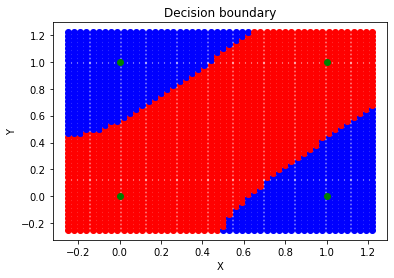

In [14]:
from matplotlib import pyplot as plt

# szemléltessük a döntési tartományokat
for x in range(0, 50):
    x_ = -0.25 + x * 1.5 / 50
    for y in range(0, 50):
        y_ = -0.25 + y * 1.5 / 50
        d = mlp.forward((x_, y_))
        if d < 0.5:
            plt.plot(x_, y_, 'ro')
        else:
            plt.plot(x_, y_, 'bo')
plt.plot([0, 0, 1, 1], [0, 1, 0, 1], 'go')  # logistic
plt.title('Decision boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()